In [1]:
from fastai.tabular.all import *
from fastbook import *
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost
from dtreeviz.trees import *

In [92]:
df = pd.read_csv('train.csv', low_memory=False, index_col='Id')
test_df = pd.read_csv('test.csv', low_memory=False, index_col='Id')

In [93]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Importing NN Embeddings

In [4]:
nn_learner = load_learner('nn_model.pkl')

In [5]:
nn_learner.dls.classes

{'ExterQual': ['#na#', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'KitchenQual': ['#na#', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'CentralAir': ['#na#', 'N', 'Y'],
 'FireplaceQu': ['#na#', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'BsmtQual': ['#na#', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'GarageFinish': ['#na#', 'Unf', 'RFn', 'Fin'],
 'MSZoning': ['#na#', 'C (all)', 'FV', 'RH', 'RL', 'RM'],
 'Neighborhood': ['#na#', 'Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'],
 'LotFrontage_na': ['#na#', False, True]}

In [6]:
nn_learner.model.embeds

ModuleList(
  (0): Embedding(6, 4)
  (1): Embedding(6, 4)
  (2): Embedding(3, 3)
  (3): Embedding(6, 4)
  (4): Embedding(6, 4)
  (5): Embedding(4, 3)
  (6): Embedding(6, 4)
  (7): Embedding(26, 10)
  (8): Embedding(3, 3)
)

In [20]:
WeightMSZoing = nn_learner.model.embeds[6].weight.detach()
WeightNeighborhood = nn_learner.model.embeds[7].weight.detach()

In [22]:
WeightMSZoing

tensor([[ 0.0020,  0.0129,  0.0146,  0.0144],
        [-0.0090,  0.0107, -0.0069,  0.0117],
        [ 0.0086, -0.0055, -0.0017,  0.0003],
        [-0.0168, -0.0026,  0.0035, -0.0021],
        [ 0.0116, -0.0012, -0.0150,  0.0087],
        [ 0.0094, -0.0088, -0.0080,  0.0168]])

In [49]:
WeightMSZoing[train_xs['MSZoning'].values]

tensor([[ 0.0094, -0.0088, -0.0080,  0.0168],
        [ 0.0116, -0.0012, -0.0150,  0.0087],
        [ 0.0116, -0.0012, -0.0150,  0.0087],
        ...,
        [ 0.0094, -0.0088, -0.0080,  0.0168],
        [-0.0168, -0.0026,  0.0035, -0.0021],
        [-0.0090,  0.0107, -0.0069,  0.0117]])

In [43]:
xs['MSZoning'][9]

5

In [317]:
nn_learner.dls.classes['MSZoning']

['#na#', 'C (all)', 'FV', 'RH', 'RL', 'RM']

### Data Pre-processing 

In [94]:
#Creating order for the ordinal categorical vars to be encoded properly

qual_order = 'Po', 'Fa', 'TA', 'Gd', 'Ex'
exp_order = 'No', 'Mn', 'Av', 'Gd'
bsmt_finish_order = 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'
garage_finish_order = 'Unf', 'RFn', 'Fin'

In [95]:
qual_var_list = ['ExterQual','ExterCond','BsmtQual','BsmtCond','KitchenQual','HeatingQC','FireplaceQu','GarageQual',
                'GarageCond','PoolQC']

In [96]:
df['BsmtExposure'] = df['BsmtExposure'].astype('category')
df['BsmtFinType1'] = df['BsmtFinType1'].astype('category') 
df['BsmtFinType2'] = df['BsmtFinType2'].astype('category') 
df['GarageFinish'] = df['GarageFinish'].astype('category')

df['BsmtExposure'].cat.set_categories(exp_order, ordered=True, inplace=True)
df['BsmtFinType1'].cat.set_categories(bsmt_finish_order, ordered=True, inplace=True)
df['BsmtFinType2'].cat.set_categories(bsmt_finish_order, ordered=True, inplace=True)
df['GarageFinish'].cat.set_categories(garage_finish_order, ordered=True, inplace=True)

for var in qual_var_list:
    df[var] = df[var].astype('category')
    df[var].cat.set_categories(qual_order, ordered=True, inplace=True)

In [97]:
df['SalePrice'] = np.log(df['SalePrice'])
cont, cat = cont_cat_split(df, 1, dep_var='SalePrice')
splitter = RandomSplitter(seed=0)
procs = [Categorify, FillMissing]

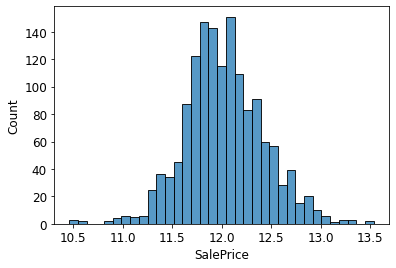

In [98]:
sns.histplot(df['SalePrice'])

In [99]:
to_wo_split = TabularPandas(df, procs, cat, cont, y_names='SalePrice')
xs, y = to_wo_split.train.xs, to_wo_split.train.y

In [100]:
to = TabularPandas(df, procs, cat, cont, y_names='SalePrice', splits=splitter(df))

In [101]:
train_xs, train_y = to.train.xs, to.train.y
valid_xs, valid_y = to.valid.xs, to.valid.y 

### Adding embedding matrix

In [114]:
#to be added to xs, train_xs, valid_xs

#adding to xs
temp_df_ms = pd.DataFrame(data = WeightMSZoing[xs['MSZoning'].values],
                      columns = ['ms'+str(i) for i in range(4)],
                      index = xs.index)
temp_df_nh = pd.DataFrame(data = WeightNeighborhood[xs['Neighborhood'].values],
                      columns = ['nh'+str(i) for i in range(10)],
                      index = xs.index)
temp_df = pd.merge(temp_df_ms, temp_df_nh, left_index=True, right_index=True)
xs = pd.merge(xs, temp_df, left_index=True, right_index=True)

In [115]:
#adding to train_xs
temp_df_ms = pd.DataFrame(data = WeightMSZoing[train_xs['MSZoning'].values],
                      columns = ['ms'+str(i) for i in range(4)],
                      index = train_xs.index)
temp_df_nh = pd.DataFrame(data = WeightNeighborhood[train_xs['Neighborhood'].values],
                      columns = ['nh'+str(i) for i in range(10)],
                      index = train_xs.index)
temp_df = pd.merge(temp_df_ms, temp_df_nh, left_index=True, right_index=True)
train_xs = pd.merge(train_xs, temp_df, left_index=True, right_index=True)

In [116]:
#adding to valid_xs
temp_df_ms = pd.DataFrame(data = WeightMSZoing[valid_xs['MSZoning'].values],
                      columns = ['ms'+str(i) for i in range(4)],
                      index = valid_xs.index)
temp_df_nh = pd.DataFrame(data = WeightNeighborhood[valid_xs['Neighborhood'].values],
                      columns = ['nh'+str(i) for i in range(10)],
                      index = valid_xs.index)
temp_df = pd.merge(temp_df_ms, temp_df_nh, left_index=True, right_index=True)
valid_xs = pd.merge(valid_xs, temp_df, left_index=True, right_index=True)

In [117]:
train_xs

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,ms0,ms1,ms2,ms3,nh0,nh1,nh2,nh3,nh4,nh5,nh6,nh7,nh8,nh9
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
421,5,2,0,4,4,1,5,1,12,3,3,3,7,2,2,13,14,2,3,4,3,4,4,4,6,1,2,5,2,5,3,7,0,2,3,3,3,3,0,0,0,9,3,1,1,1,90,78.0,7060,7,5,1997,1998,200.0,1309,0,35,1344,1344,0,0,1344,2,0,2,0,2,2,8,0,1997.0,4,784,0,0,0,0,0,0,0,11,2008,0.009397,-0.008803,-0.007960,0.016819,-0.004091,0.003537,-0.001749,0.004014,-0.007997,0.005361,0.012450,0.002916,0.003029,0.004704
2,4,2,0,4,4,1,3,1,25,2,3,1,3,2,2,9,9,3,3,3,2,4,3,4,5,1,2,5,2,5,3,7,3,2,2,3,3,3,0,0,0,9,5,1,1,1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,0.011551,-0.001237,-0.015030,0.008720,-0.008214,-0.010766,0.014014,-0.008754,-0.017472,0.006820,0.005468,0.023622,-0.013183,0.010270
493,4,2,0,1,4,1,1,1,9,3,3,1,6,2,2,13,14,3,4,3,3,4,3,1,1,1,2,4,2,5,3,7,0,2,2,3,3,3,0,0,0,7,6,1,1,1,60,105.0,15578,6,5,2006,2006,0.0,0,0,728,728,728,728,0,1456,0,0,2,1,3,1,8,0,2006.0,2,429,0,0,0,0,0,0,0,5,2006,0.011551,-0.001237,-0.015030,0.008720,0.012430,-0.017269,0.008345,0.012508,-0.011803,-0.018333,-0.012565,0.001281,0.012799,0.011410
1281,4,2,0,1,4,1,5,1,6,3,3,1,3,2,2,13,14,2,4,3,3,4,3,1,6,1,2,5,2,5,4,7,0,2,2,3,3,3,0,0,0,9,5,1,1,1,20,67.0,9808,7,5,2002,2002,110.0,788,0,785,1573,1573,0,0,1573,1,0,2,0,3,1,6,0,2002.0,2,544,0,72,0,0,0,0,0,3,2009,0.011551,-0.001237,-0.015030,0.008720,0.014084,-0.005544,-0.009916,-0.007328,-0.019085,-0.003968,-0.004801,-0.009124,0.005951,0.007975
467,4,2,0,4,4,1,5,1,13,3,3,1,3,1,6,10,11,3,3,4,2,3,4,4,6,1,2,3,2,5,3,7,1,2,1,3,3,3,0,2,0,9,5,1,1,1,20,85.0,10628,7,5,1970,1970,0.0,778,0,499,1277,1277,0,0,1277,1,0,1,0,2,1,5,1,1970.0,2,526,0,0,0,0,176,0,0,4,2007,0.011551,-0.001237,-0.015030,0.008720,0.006496,0.003112,0.003449,0.012830,0.000201,0.000999,0.011863,0.000899,-0.001437,0.013204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,4,2,0,4,4,1,5,1,15,5,3,1,3,4,8,4,4,3,4,3,3,4,3,1,5,1,2,3,2,5,4,7,4,2,3,3,3,3,0,3,0,9,5,1,1,1,20,80.0,9600,8,5,1981,1981,0.0,1104,0,1420,2524,2524,0,0,2524,1,0,2,1,4,1,9,1,1981.0,2,542,474,120,0,0,0,0,0,7,2009,0.011551,-0.001237,-0.015030,0.008720,-0.003162,-0.006385,-0.002592,0.008036,0.000179,0.006595,0.002527,-0.016119,0.002550,-0.020312
236,5,2,0,4,4,1,5,1,3,3,3,5,6,2,2,7,7,2,3,3,2,3,3,1,5,1,2,3,2,5,3,7,0,6,1,3,3,3,0,0,0,9,5,1,1,1,160,21.0,1680,6,3,1971,1971,604.0,358,0,125,483,483,504,0,987,0,0,1,1,2,1,5,0,1971.0,1,264,0,0,0,0,0,0,0,8,2008,0.009397,-0.008803,-0.007960,0.016819,-0.006538,0.007183,-0.000160,-0.014095,-0.004773,-0.004194,-0.003290,-0.006923,0.012439,-0.015607
399,5,2,0,4,4,1,1,1,10,3,3,1,3,2,2,9,9,3,3,2,1,2,1,1,1,1,2,4,2,4,3,2,0,6,1,1,1,1,0,0,0,9,1,1,1,1,30,60.0,8967,5,2,1920,1950,0.0,0,0,961,961,1077,0,0,1077,0,0,1,0,2,1,6,

### Keeping relevant vars

In [120]:
#Loading important set of vars from RF model
#'MSZoning',, 'Neighborhood'
final_var_list = ['OverallQual', 'GrLivArea', 'ExterQual', 'YearBuilt', 'GarageCars',
                   'TotalBsmtSF', 'KitchenQual', '1stFlrSF', 'BsmtFinSF1', 'LotArea',
                   'FireplaceQu', 'CentralAir', '2ndFlrSF', 'OverallCond', 'YearRemodAdd',
                    'BsmtQual', 'GarageFinish', 'LotFrontage', 'BsmtUnfSF',
                   'FullBath']+['ms'+str(i) for i in range(4)]+['nh'+str(i) for i in range(10)]
#final_var_list

In [121]:
xs_final = xs[final_var_list]
train_xs_final = train_xs[final_var_list]
valid_xs_final = valid_xs[final_var_list]
#train_xs_final = train_xs
#valid_xs_final = valid_xs

### Model training

In [122]:
# models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

In [123]:
def rmse(y_true, y_pred):
    return round(np.sqrt(((y_true-y_pred)**2).mean()),6)

def m_rmse(m, xs, y):
    return rmse(y, m.predict(xs))

In [124]:
#get a sense of n_estimators at learning rate of .1
xgb1 = XGBRegressor(n_estimators=1000, random_state=0, learning_rate=.1)
xgb1.fit(train_xs_final, train_y, early_stopping_rounds=10, eval_set=[(valid_xs_final, valid_y)])

print('training rmse: ', m_rmse(xgb1, train_xs_final, train_y))
print('validation rmse: ', m_rmse(xgb1, valid_xs_final, valid_y))

[0]	validation_0-rmse:10.39685
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:9.36174
[2]	validation_0-rmse:8.43024
[3]	validation_0-rmse:7.58937
[4]	validation_0-rmse:6.83257
[5]	validation_0-rmse:6.15295
[6]	validation_0-rmse:5.53981
[7]	validation_0-rmse:4.98947
[8]	validation_0-rmse:4.49374
[9]	validation_0-rmse:4.04635
[10]	validation_0-rmse:3.64629
[11]	validation_0-rmse:3.28597
[12]	validation_0-rmse:2.96157
[13]	validation_0-rmse:2.66940
[14]	validation_0-rmse:2.40551
[15]	validation_0-rmse:2.16729
[16]	validation_0-rmse:1.95409
[17]	validation_0-rmse:1.76333
[18]	validation_0-rmse:1.59085
[19]	validation_0-rmse:1.43533
[20]	validation_0-rmse:1.29592
[21]	validation_0-rmse:1.17000
[22]	validation_0-rmse:1.05672
[23]	validation_0-rmse:0.95580
[24]	validation_0-rmse:0.86429
[25]	validation_0-rmse:0.78177
[26]	validation_0-rmse:0.70817
[27]	validation_0-rmse:0.64175
[28]	validation_0-rmse:0.58305
[29]	validation_0-rmse:0.52950
[30]	validatio

In [126]:
fe = pd.DataFrame({'cols': train_xs_final.columns,
                   'imp': xgb1.feature_importances_}).sort_values(by='imp', ascending=False)
fe[:10]

,cols,imp
16,GarageFinish,0.125807
23,ms3,0.115126
4,GarageCars,0.099758
6,KitchenQual,0.092715
10,FireplaceQu,0.077776
15,BsmtQual,0.063452
0,OverallQual,0.054165
11,CentralAir,0.041031
5,TotalBsmtSF,0.040288
1,GrLivArea,0.038706


<Figure size 1008x432 with 0 Axes>

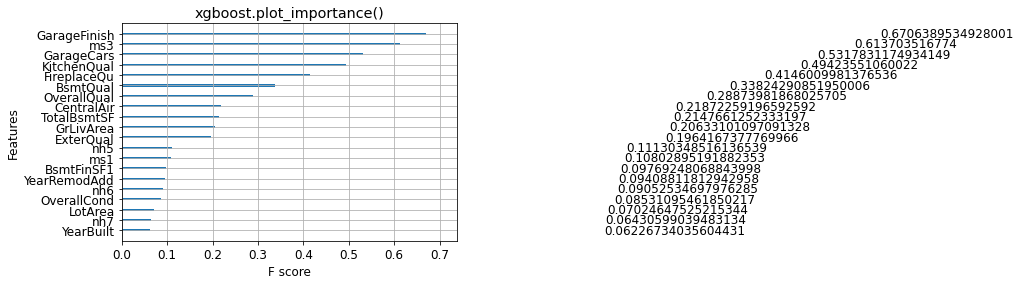

In [127]:
plt.figure(figsize=(14,6))
xgboost.plot_importance(xgb1, max_num_features=20, importance_type='gain')
plt.title('xgboost.plot_importance()')
plt.show()

In [49]:
# XGBoost with GridSearchCV

''' A parameter grid for XGBoost
params = {
        'n_estimators': [224],              #number of trees in the boosted model, default=100 (doubtful)
        'learning_rate': [.1],              #Makes the model robust by shrinking the weights on each step, default=0.3
        'max_depth': [4, 5, 6],             #maximum depth of a tree, default=6
        'min_child_weight': [1, 3, 5],      #minimum sum of weights of all observations required in a child, default=1
        'gamma': [0],                       #minimum loss reduction required to make a split, default=0
        'subsample': [0.8],                 #fraction of observations to be randomly samples for each tree, default=1
        'colsample_bytree': [0.8]           #fraction of columns to be randomly samples for each tree, default=1
        }
'''

" A parameter grid for XGBoost\nparams = {\n        'n_estimators': [224],              #number of trees in the boosted model, default=100 (doubtful)\n        'learning_rate': [.1],              #Makes the model robust by shrinking the weights on each step, default=0.3\n        'max_depth': [4, 5, 6],             #maximum depth of a tree, default=6\n        'min_child_weight': [1, 3, 5],      #minimum sum of weights of all observations required in a child, default=1\n        'gamma': [0],                       #minimum loss reduction required to make a split, default=0\n        'subsample': [0.8],                 #fraction of observations to be randomly samples for each tree, default=1\n        'colsample_bytree': [0.8]           #fraction of columns to be randomly samples for each tree, default=1\n        }\n"

In [129]:
# XGBoost with GridSearchCV
# Fix learning rate and n_estimators as above and optimize max_depth, min_child_weight
# If needed first pass could be run with higher range of values
params = {
        'max_depth': [6,7,8],             
        'min_child_weight': [2,3,4]      
        }

gs1 = GridSearchCV(estimator=XGBRegressor(nthread=8, random_state=0,
                                          n_estimators=83, learning_rate=0.1,
                                          max_depth=6, min_child_weight=5,
                                          gamma=0,
                                          subsample=0.8, colsample_bytree=0.8), 
                   param_grid=params, cv=5, scoring='neg_root_mean_squared_error')
gs1.fit(xs_final, df['SalePrice'])
gs1.best_params_, gs1.best_score_

({'max_depth': 7, 'min_child_weight': 3}, -0.12249620451567553)

In [130]:
# Fixing the tuned values and tuning gamma now
params = {
        'gamma': [0,0.001,0.003,0.005,0.007]     
        }

gs1 = GridSearchCV(estimator=XGBRegressor(nthread=8, random_state=0,
                                          n_estimators=83, learning_rate=0.1,
                                          max_depth=7, min_child_weight=3,
                                          gamma=0,
                                          subsample=0.8, colsample_bytree=0.8), 
                   param_grid=params, cv=5, scoring='neg_root_mean_squared_error')
gs1.fit(xs_final, df['SalePrice'])
gs1.best_params_, gs1.best_score_

({'gamma': 0.007}, -0.12192113923959731)

In [131]:
# Re-calibrating #n_estimators basis the tuned parameters
xgb2 = XGBRegressor(n_estimators=1000, random_state=0, learning_rate=.1,
                    max_depth=7, min_child_weight=3,
                    gamma=0.007,
                    subsample=0.8, colsample_bytree=0.8)
xgb2.fit(train_xs_final, train_y, early_stopping_rounds=10, eval_set=[(valid_xs_final, valid_y)])

print('training rmse: ', m_rmse(xgb2, train_xs_final, train_y))
print('validation rmse: ', m_rmse(xgb2, valid_xs_final, valid_y))

[0]	validation_0-rmse:10.39727
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:9.36204
[2]	validation_0-rmse:8.43064
[3]	validation_0-rmse:7.59337
[4]	validation_0-rmse:6.83922
[5]	validation_0-rmse:6.15812
[6]	validation_0-rmse:5.54523
[7]	validation_0-rmse:4.99448
[8]	validation_0-rmse:4.49946
[9]	validation_0-rmse:4.05286
[10]	validation_0-rmse:3.65197
[11]	validation_0-rmse:3.29161
[12]	validation_0-rmse:2.96445
[13]	validation_0-rmse:2.67224
[14]	validation_0-rmse:2.40866
[15]	validation_0-rmse:2.17122
[16]	validation_0-rmse:1.95828
[17]	validation_0-rmse:1.76670
[18]	validation_0-rmse:1.59376
[19]	validation_0-rmse:1.43907
[20]	validation_0-rmse:1.29987
[21]	validation_0-rmse:1.17344
[22]	validation_0-rmse:1.06089
[23]	validation_0-rmse:0.95961
[24]	validation_0-rmse:0.86734
[25]	validation_0-rmse:0.78515
[26]	validation_0-rmse:0.71147
[27]	validation_0-rmse:0.64483
[28]	validation_0-rmse:0.58483
[29]	validation_0-rmse:0.53199
[30]	validatio

In [132]:
# Tuning subsample and colsample_bytree
params = {
        'subsample': [0.75,0.8,0.85],
        'colsample_bytree': [0.75,0.8,0.85] 
        }

gs1 = GridSearchCV(estimator=XGBRegressor(nthread=8, random_state=0,
                                          n_estimators=81, learning_rate=0.1,
                                          max_depth=7, min_child_weight=3,
                                          gamma=0.007,
                                          subsample=0.8, colsample_bytree=0.8), 
                   param_grid=params, cv=5, scoring='neg_root_mean_squared_error')
gs1.fit(xs_final, df['SalePrice'])
gs1.best_params_, gs1.best_score_

({'colsample_bytree': 0.8, 'subsample': 0.8}, -0.12198401783202883)

In [134]:
# Adding more trees by reducing learning rate
xgb3 = XGBRegressor(n_estimators=1000, random_state=0, learning_rate=.06,
                    max_depth=7, min_child_weight=3,
                    gamma=0.007,
                    subsample=0.8, colsample_bytree=0.8)
xgb3.fit(train_xs_final, train_y, early_stopping_rounds=40, eval_set=[(valid_xs_final, valid_y)])

print('training rmse: ', m_rmse(xgb3, train_xs_final, train_y))
print('validation rmse: ', m_rmse(xgb3, valid_xs_final, valid_y))

[0]	validation_0-rmse:10.85716
Will train until validation_0-rmse hasn't improved in 40 rounds.
[1]	validation_0-rmse:10.20839
[2]	validation_0-rmse:9.59871
[3]	validation_0-rmse:9.02615
[4]	validation_0-rmse:8.48753
[5]	validation_0-rmse:7.98139
[6]	validation_0-rmse:7.50426
[7]	validation_0-rmse:7.05673
[8]	validation_0-rmse:6.63460
[9]	validation_0-rmse:6.23836
[10]	validation_0-rmse:5.86682
[11]	validation_0-rmse:5.51609
[12]	validation_0-rmse:5.18601
[13]	validation_0-rmse:4.87747
[14]	validation_0-rmse:4.58655
[15]	validation_0-rmse:4.31319
[16]	validation_0-rmse:4.05654
[17]	validation_0-rmse:3.81550
[18]	validation_0-rmse:3.58907
[19]	validation_0-rmse:3.37657
[20]	validation_0-rmse:3.17694
[21]	validation_0-rmse:2.98923
[22]	validation_0-rmse:2.81227
[23]	validation_0-rmse:2.64654
[24]	validation_0-rmse:2.49007
[25]	validation_0-rmse:2.34347
[26]	validation_0-rmse:2.20484
[27]	validation_0-rmse:2.07501
[28]	validation_0-rmse:1.95216
[29]	validation_0-rmse:1.83796
[30]	validati

In [244]:
# Fitting on entire dataset
final_model = XGBRegressor(n_estimators=223, random_state=0, learning_rate=.06,
                           max_depth=8, min_child_weight=2,
                           gamma=0.00,
                           subsample=0.8, colsample_bytree=0.85)
final_model.fit(xs_final, df['SalePrice'])

print('training rmse: ',   m_rmse(final_model, train_xs_final, train_y))
print('validation rmse: ', m_rmse(final_model, valid_xs_final, valid_y))
print('total rmse: ',      m_rmse(final_model, xs_final, df['SalePrice']))

training rmse:  0.002481
validation rmse:  0.002235
total rmse:  0.00233


In [138]:
# Fitting on entire dataset - best results are obtained when hyperparameters are found basis the reduced var dataset
# but final fit done on entire dataset!
final_model = XGBRegressor(n_estimators=328, random_state=0, learning_rate=.06,
                           max_depth=7, min_child_weight=2,
                           gamma=0.00,
                           subsample=0.8, colsample_bytree=0.8)
final_model.fit(xs.drop(columns=['MSZoning','Neighborhood']), df['SalePrice'])

print('training rmse: ',   m_rmse(final_model, train_xs.drop(columns=['MSZoning','Neighborhood']), train_y))
print('validation rmse: ', m_rmse(final_model, valid_xs.drop(columns=['MSZoning','Neighborhood']), valid_y))
print('total rmse: ',      m_rmse(final_model, xs.drop(columns=['MSZoning','Neighborhood']), df['SalePrice']))

training rmse:  0.011399
validation rmse:  0.010609
total rmse:  0.011003


In [162]:
final_model = XGBRegressor(n_estimators=328, random_state=0, learning_rate=.06,
                           max_depth=7, min_child_weight=2,
                           gamma=0.00,
                           subsample=0.8, colsample_bytree=0.8)
final_model.fit(xs[final_var_list], df['SalePrice'])

print('training rmse: ',   m_rmse(final_model, train_xs[final_var_list], train_y))
print('validation rmse: ', m_rmse(final_model, valid_xs[final_var_list], valid_y))
print('total rmse: ',      m_rmse(final_model, xs[final_var_list], df['SalePrice']))

training rmse:  0.020413
validation rmse:  0.018714
total rmse:  0.018316


In [139]:
#loading the last best model
model = xgboost.XGBRegressor()
model.load_model(fname='best_xgb_model.json')

In [145]:
cols=['ms'+str(i) for i in range(4)]+['nh'+str(i) for i in range(10)]
print('training rmse: ',   m_rmse(model, train_xs.drop(columns=cols), train_y))
print('validation rmse: ', m_rmse(model, valid_xs.drop(columns=cols), valid_y))
print('total rmse: ',      m_rmse(model, xs.drop(columns=cols), df['SalePrice']))

ValueError: feature_names mismatch: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'LotFrontage_na', 'MasVnrArea_na', 'GarageYrBlt_na', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'ms0', 'ms1', 'ms2', 'ms3', 'nh0', 'nh1', 'nh2', 'nh3', 'nh4', 'nh5', 'nh6', 'nh7', 'nh8', 'nh9'] ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'LotFrontage_na', 'MasVnrArea_na', 'GarageYrBlt_na', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
expected nh2, nh9, nh6, nh5, nh8, ms3, nh1, ms2, ms1, nh7, nh3, nh0, ms0, nh4 in input data

In [161]:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'LotFrontage_na', 'MasVnrArea_na', 'GarageYrBlt_na', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'ms0', 'ms1', 'ms2', 'ms3', 'nh0', 'nh1', 'nh2', 'nh3', 'nh4', 'nh5', 'nh6', 'nh7', 'nh8', 'nh9']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'LotFrontage_na', 'MasVnrArea_na', 'GarageYrBlt_na', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

['ms0',
 'ms1',
 'ms2',
 'ms3',
 'nh0',
 'nh1',
 'nh2',
 'nh3',
 'nh4',
 'nh5',
 'nh6',
 'nh7',
 'nh8',
 'nh9']

### Prediction

In [245]:
train_missing = df[cont].isna().sum()
test_missing = test_df[cont].isna().sum()
dtypes = test_df[cont].dtypes
a = pd.DataFrame({'train_missing':train_missing,
                 'test_missing':test_missing,
                 'dtypes':dtypes})
a[(a['train_missing']==0) & (a['test_missing']>0)]

,train_missing,test_missing,dtypes
BsmtFinSF1,0,1,float64
BsmtFinSF2,0,1,float64
BsmtUnfSF,0,1,float64
TotalBsmtSF,0,1,float64
BsmtFullBath,0,2,float64
BsmtHalfBath,0,2,float64
GarageCars,0,1,float64
GarageArea,0,1,float64


In [151]:
test = test_df.copy()

In [152]:
#additional missing value in test continuous vars which wasnt there in training data
#in categorical 
test.loc[test['BsmtFinSF1'].isna(),'BsmtFinSF1'] = 0
test.loc[test['BsmtFinSF2'].isna(),'BsmtFinSF2'] = 0
test.loc[test['BsmtUnfSF'].isna(),'BsmtUnfSF'] = 0
test.loc[test['TotalBsmtSF'].isna(),'TotalBsmtSF'] = 0
test.loc[test['BsmtFullBath'].isna(),'BsmtFullBath'] = 0
test.loc[test['BsmtHalfBath'].isna(),'BsmtHalfBath'] = 0
test.loc[test['GarageCars'].isna(),'GarageCars'] = 0
test.loc[test['GarageArea'].isna(),'GarageArea'] = 0

In [153]:
test_to = to.valid.new(test)
test_to.process()
test_xs = test_to.xs

In [154]:
#adding embeddings values to test
temp_df_ms = pd.DataFrame(data = WeightMSZoing[test_xs['MSZoning'].values],
                      columns = ['ms'+str(i) for i in range(4)],
                      index = test_xs.index)
temp_df_nh = pd.DataFrame(data = WeightNeighborhood[test_xs['Neighborhood'].values],
                      columns = ['nh'+str(i) for i in range(10)],
                      index = test_xs.index)
temp_df = pd.merge(temp_df_ms, temp_df_nh, left_index=True, right_index=True)
test_xs = pd.merge(test_xs, temp_df, left_index=True, right_index=True)

In [157]:
test_xs_final = test_xs.drop(columns=['MSZoning','Neighborhood'])

In [158]:
xgb_preds = np.exp(final_model.predict(test_xs_final))

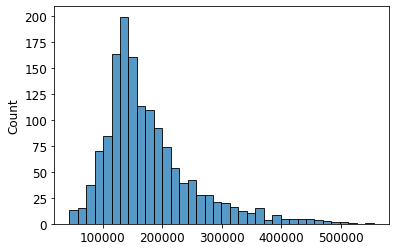

In [159]:
sns.histplot(xgb_preds)

In [160]:
output = pd.DataFrame({'Id': test.index,
                       'SalePrice': xgb_preds})
output.to_csv('submission_xgb9.csv', index=False)